In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [154]:
nypd_arrest = pd.read_csv("dataset/NYPD_Arrest_Data__Year_to_Date_cleaned.csv")
print(nypd_arrest.columns)

Index(['Unnamed: 0', 'Arrest_Date', 'Police_Department_Code',
       'Offense_Description', 'Offense_Key_Code',
       'Offense_Detailed_Description', 'Law_Code', 'Offense_Category_Code',
       'Arrest_Borough', 'Arrest_Precinct', 'Jurisdiction_Code',
       'Perpetrator_Age_Group', 'Perpetrator_Sex', 'Perpetrator_Race',
       'Latitude', 'Longitude', 'Location', 'Arrest_Day_of_Week'],
      dtype='object')


<BarContainer object of 5 artists>

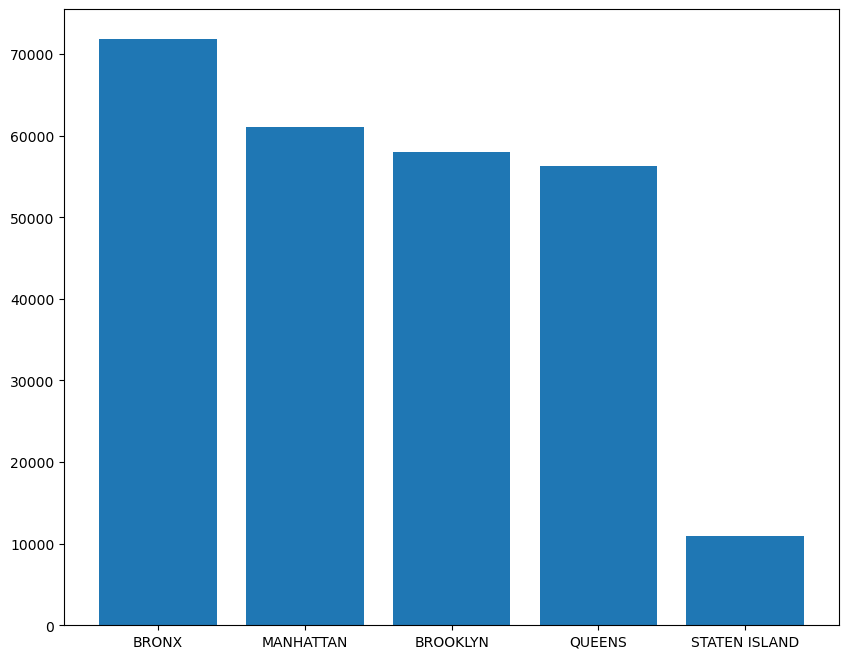

In [155]:
# Count of arrests by borough

arrest_count = nypd_arrest["Arrest_Borough"].value_counts()
plt.figure(figsize=(10,8))
plt.bar(arrest_count.index, arrest_count.values)


Offense_Category_Code
M    146174
F    108818
V      2212
9       731
I       224
Name: count, dtype: int64


<BarContainer object of 5 artists>

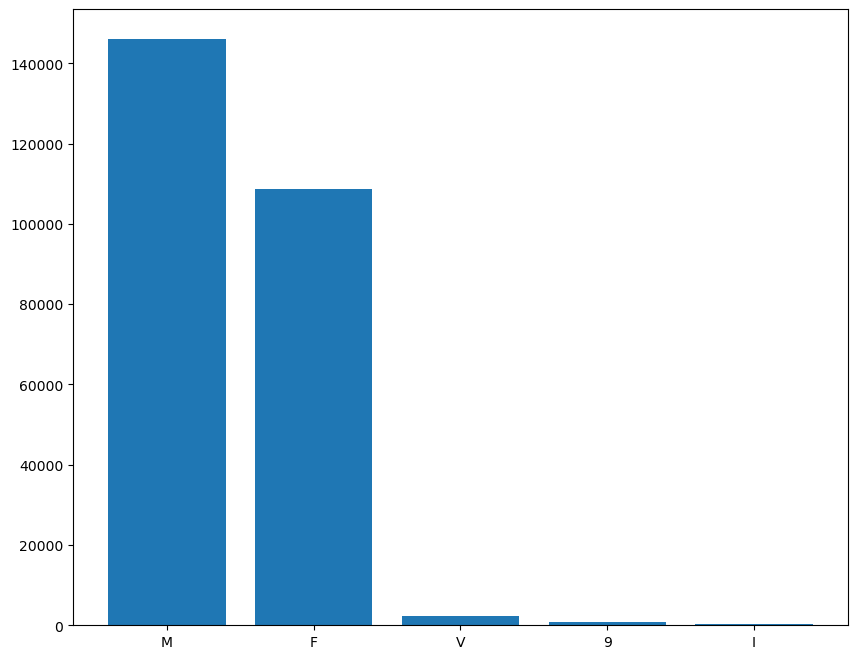

In [156]:
# Count of offenses by category
offense_count = nypd_arrest["Offense_Category_Code"].value_counts()
print(offense_count)
plt.figure(figsize=(10, 8))
plt.bar(offense_count.index, offense_count.values)



Arrest_Day_of_Week
Wednesday    44020
Thursday     41841
Tuesday      40753
Friday       37824
Saturday     32711
Monday       32645
Sunday       28365
Name: count, dtype: int64


<BarContainer object of 7 artists>

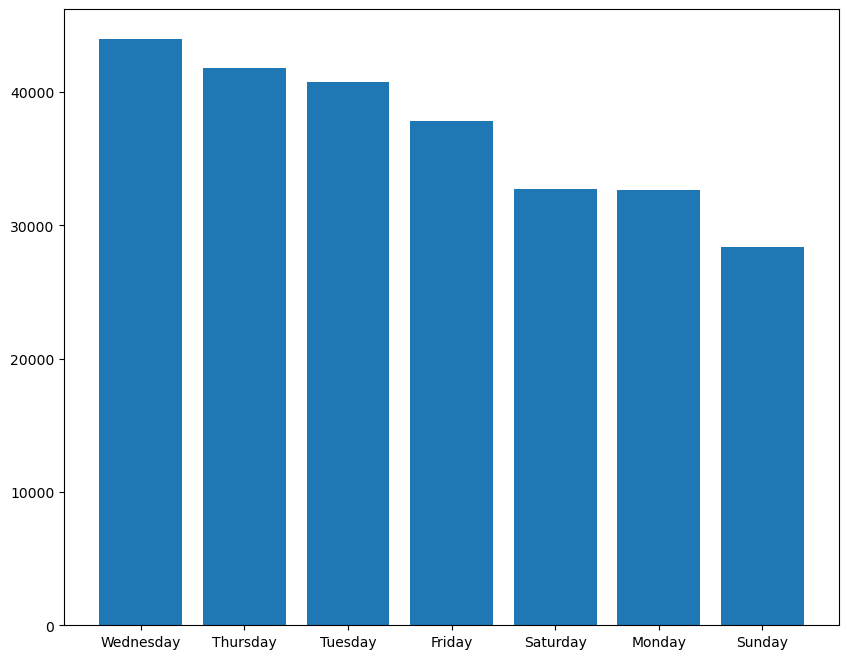

In [157]:
# Arrests by Day of the Week
weekday_count = nypd_arrest["Arrest_Day_of_Week"].value_counts()
print(weekday_count)
plt.figure(figsize=(10, 8))
plt.bar(weekday_count.index, weekday_count.values)


Perpetrator_Sex
M    211546
F     46613
Name: count, dtype: int64


<BarContainer object of 2 artists>

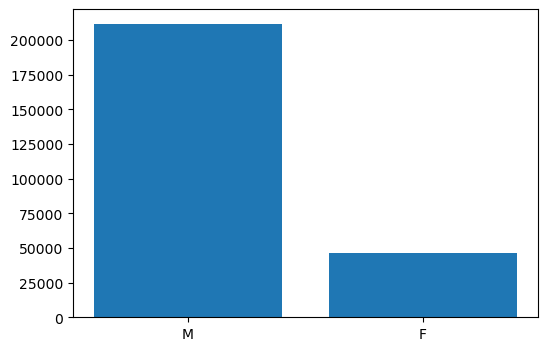

In [158]:

# Gender distribution of arrestees
plt.figure(figsize=(6, 4))
gender_distribution = nypd_arrest["Perpetrator_Sex"].value_counts()
print(gender_distribution)
plt.bar(gender_distribution.index, gender_distribution.values)

Perpetrator_Age_Group
25-44    150548
45-64     50727
18-24     42776
<18        9489
65+        4619
Name: count, dtype: int64


<BarContainer object of 5 artists>

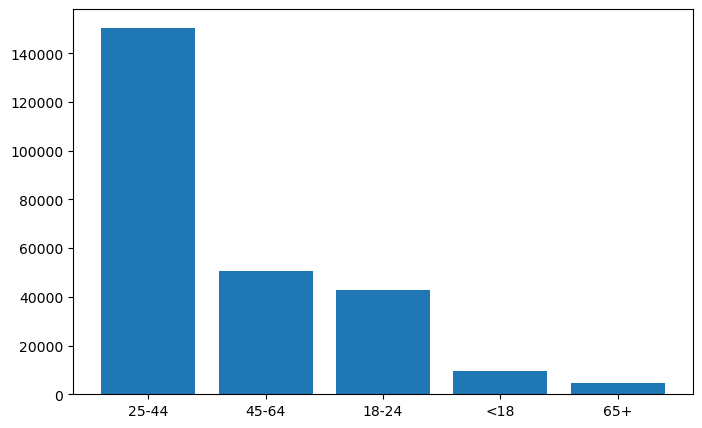

In [159]:
# Age group distribution
plt.figure(figsize=(8, 5))
age_distribution = nypd_arrest["Perpetrator_Age_Group"].value_counts()
print(age_distribution)
plt.bar(age_distribution.index, age_distribution.values)

Perpetrator_Race
BLACK              121512
HISPANIC            95097
WHITE               26017
ASIAN               14716
NATIVE AMERICAN       817
Name: count, dtype: int64


<BarContainer object of 5 artists>

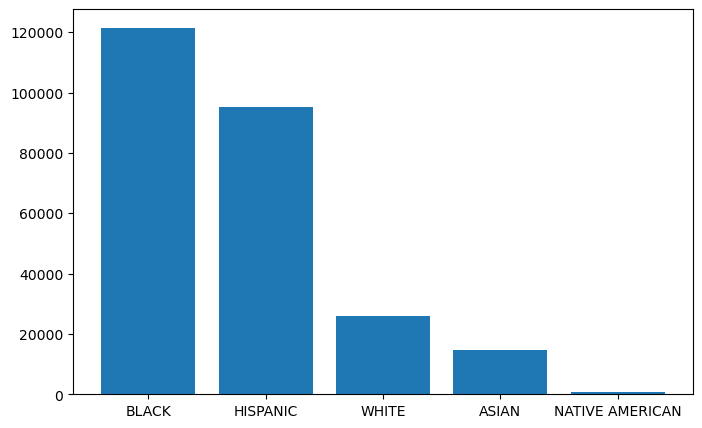

In [160]:
# Race distribution
plt.figure(figsize=(8, 5))
race_distribution = nypd_arrest["Perpetrator_Race"].value_counts()
print(race_distribution)
plt.bar(race_distribution.index, race_distribution.values)

Arrest_Precinct
14     9819
75     8646
40     8338
103    7959
44     7623
46     6558
110    6430
73     5716
120    5493
18     5448
Name: count, dtype: int64


<BarContainer object of 10 artists>

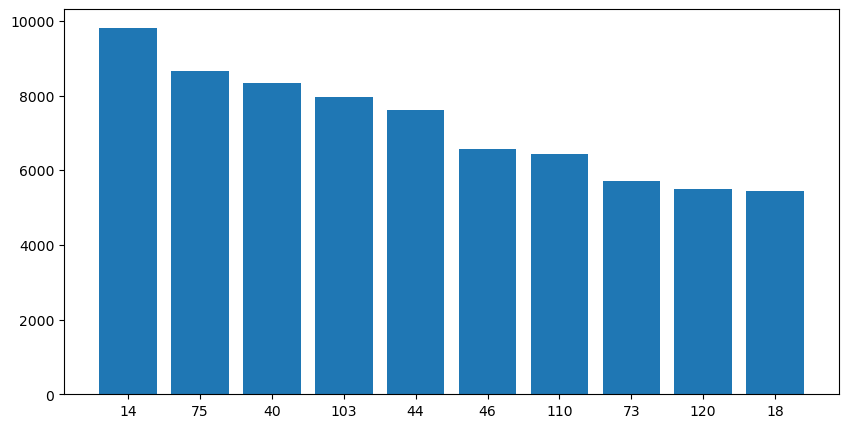

In [180]:
# Top 10 precincts with the most arrests for nlargest function: (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html)
top_precincts = nypd_arrest["Arrest_Precinct"].value_counts().nlargest(10) 
print(top_precincts)
plt.figure(figsize=(10, 5))
# we have to use asType because otherwise pythone reads x value as int (https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html)
plt.bar(top_precincts.index.astype(str), top_precincts.values)


<Axes: title={'center': 'Geospatial Distribution of Arrests in NYC'}, xlabel='Longitude', ylabel='Latitude'>

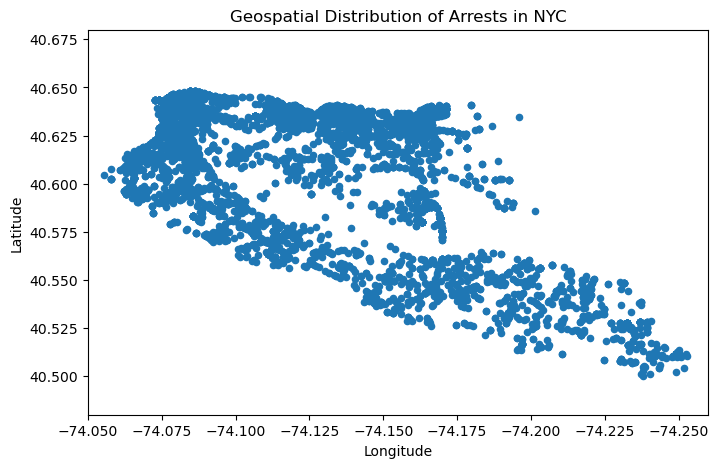

In [184]:
# Scatter plot of Latitude vs. Longitude for arrests
nypd_arrest.plot.scatter(x="Longitude",y="Latitude",figsize=(8, 5),title="Geospatial Distribution of Arrests in NYC", xlim=(-74.05, -74.26), ylim=(40.48, 40.68))

In [190]:
""" Convert Arrest_Date to datetime format """

nypd_arrest['Arrest_Date'] = pd.to_datetime(nypd_arrest['Arrest_Date'])

assert str(nypd_arrest["Arrest_Date"].dtype) == "datetime64[ns]"  # Verify converted type

In [192]:
nypd_arrest.dtypes

Unnamed: 0                               int64
Arrest_Date                     datetime64[ns]
Police_Department_Code                 float64
Offense_Description                     object
Offense_Key_Code                       float64
Offense_Detailed_Description            object
Law_Code                                object
Offense_Category_Code                   object
Arrest_Borough                          object
Arrest_Precinct                          int64
Jurisdiction_Code                        int64
Perpetrator_Age_Group                   object
Perpetrator_Sex                         object
Perpetrator_Race                        object
Latitude                               float64
Longitude                              float64
Location                                object
Arrest_Day_of_Week                      object
dtype: object

In [ ]:
# Category mapping
category_map = {
    'F': 'Felony',
    'M': 'Misdemeanor',
    '9': 'Unclassified',
    'V': 'Violation',
    'I': 'Infraction'
}

# Convert Arrest_Date to datetime if not already
df['Arrest_Date'] = pd.to_datetime(df['Arrest_Date'])

# Group by year-month and offense category, then count occurrences
monthly_counts = df.groupby([df['Arrest_Date'].dt.to_period('M'), 'Offense_Category_Code']).size().unstack()

# Rename columns using category_map
monthly_counts = monthly_counts.rename(columns=category_map)

# Plot
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', figsize=(12, 6))

plt.title('Monthly Change in Offense Categories')
plt.xlabel('Month')
plt.ylabel('Number of Offenses')
plt.legend(title='Offense Category')
plt.grid(True)
plt.show()

In [ ]:
df.columns

In [ ]:
# Convert Arrest_Date to datetime if not already
df['Arrest_Date'] = pd.to_datetime(df['Arrest_Date'])

# Group by year-month and offense category, then count occurrences
monthly_counts = df.groupby([df['Arrest_Date'].dt.to_period('M'), 'Offense_Detailed_Description']).size().unstack()

# Rename columns using category_map
monthly_counts = monthly_counts.rename(columns=category_map)

# Plot
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', figsize=(12, 6))

plt.title('Monthly Change In Different Offenses')
plt.xlabel('Month')
plt.ylabel('Number of Offenses')
plt.legend(title='Offense Category')
plt.grid(True)

In [ ]:

# Mapping labels for better readability
offense_labels = {
    'OTHER': 'Other Crimes',
    'ASSAULT': 'Assault',
    'DRUGS': 'Drug-Related Crimes',
    'THEFT': 'Theft'
}

race_labels = {
    'BLACK': 'Black',
    'WHITE': 'White',
    'HISPANIC': 'Hispanic',
    'UNKNOWN': 'Unknown',
    'ASIAN': 'Asian',
    'NATIVE AMERICAN': 'Native American'
}

gender_labels = {
    'M': 'Male',
    'F': 'Female'
}

# Apply the label mappings
df['Offense_Detailed_Description'] = df['Offense_Detailed_Description'].map(offense_labels)
df['Perpetrator_Race'] = df['Perpetrator_Race'].map(race_labels)
df['Perpetrator_Sex'] = df['Perpetrator_Sex'].map(gender_labels)

# Count occurrences
grouped_df = df.groupby(['Offense_Detailed_Description', 'Perpetrator_Race', 'Perpetrator_Sex']).size().reset_index(name='Count')

# Pivot the DataFrame to reshape it for stacked bars
pivot_df = grouped_df.pivot_table(index=['Offense_Detailed_Description', 'Perpetrator_Race'], columns='Perpetrator_Sex', values='Count', fill_value=0)

# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.7, colormap='viridis')

# Customize plot
plt.title('Crime Offenses by Perpetrator Race & Sex', fontsize=14)
plt.xlabel('Offense Type & Perpetrator Race', fontsize=12)
plt.ylabel('Number of Offenses', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Perpetrator Sex", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Count arrests per month
monthly_arrests = df.groupby(df['Arrest_Date'].dt.to_period('M')).size()

# Plot
plt.figure(figsize=(12, 6))
monthly_arrests.plot(kind='line', marker='o', linewidth=2)

plt.title('Monthly Trend of Arrests')
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

plt.show()

In [ ]:
df.columns

In [ ]:
# Convert Arrest_Date to datetime if not already

"""
There is a significant gap between the number of males and females arrested throughout the year.
"""

df['Arrest_Date'] = pd.to_datetime(df['Arrest_Date'])

# Group by year-month and offense category, then count occurrences
monthly_counts = df.groupby([df['Arrest_Date'].dt.to_period('M'), 'Perpetrator_Sex']).size().unstack()

# Rename columns using category_map
monthly_counts = monthly_counts.rename(columns=category_map)

# Plot
# plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', figsize=(12, 6))

plt.title('Montly arrested count by gender')
plt.xlabel('Month')
plt.ylabel('Number of Offenses')
plt.legend(title='Offense Category')
plt.grid(True)



In [ ]:
df[(df["Perpetrator_Sex"] == "Male") & (df["Arrest_Date"].dt.month == 1)].count()

In [ ]:
df[(df["Perpetrator_Sex"] == "Female") & (df["Arrest_Date"].dt.month == 1)].count()